# Preprocessing
We have focused on extracting the following:
* packages
* libraries
* classes
* methods (public)
* variables (public)
* comments

In [210]:
# Imports and scripts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pathmagic
%matplotlib inline
with pathmagic.context():
    import Preprocess as Prep
    import RelativePaths as RP
    import Evaluation as Eva

%run ../script/GatherData.py

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Shows the number of files for every label, from JabRef')

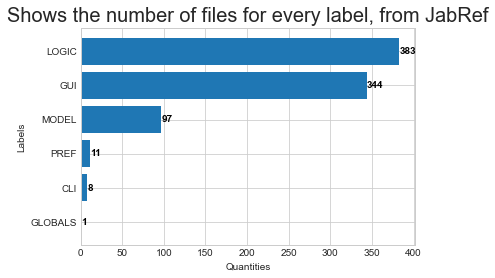

In [211]:
dataset_df = pd.read_csv(str(RP.getRawDataSet()))
y_labels = dataset_df.Label.unique()
x_quantity = [len(dataset_df.loc[dataset_df['Label']==label]) for label in y_labels]
tmp_df = pd.DataFrame({
    'Labels' : y_labels,
    'Quantity' : x_quantity
})
tmp_df = tmp_df.sort_values(by=['Quantity'])
plt.style.use("seaborn-whitegrid")
plt.barh(y=tmp_df.Labels, width=tmp_df.Quantity)
for i, v in enumerate(tmp_df.Quantity):
    plt.text(v, i, str(v), color='black', fontweight='bold', ha='left', va='center')

plt.xlabel('Quantities')
plt.ylabel('Labels')
plt.title('Shows the number of files for every label, from JabRef',fontsize = 20)

# Evaluation
The figure above shows the spread of the given concerns and imbalance in the dataset taken from the JabRef architecture.

### Static parts
__Train-test split,__ will be set at 10% for training, and 90% for evaluation.  
* __Metrics,__ the most relevant ones will be the following:  
   * Confusion matrix  
   * Precission  
   * Accuracy  
   * F1-score/value  
   * Average score (laoa will explain)  
    
----

### Preprocessing settings
```
settings = [
        ['extraction', 'parsing' ... ,'parsing],
        ...,
        ['extraction', 'parsing']
    ]
```
#### Extraction options
* Raw data: 'raw'
* Classes: 'c'
* Public methods: 'pm'
* Public variables/objects: 'pv'
* Import: 'lib'
* Packages: 'pac'
* Comments: 'com'
* Clear commands: 'clear'

#### Parsing options
* Lower case: 'lc'
* Remove single characters:  'sc'
* Remove stop words: 'sw'
* Remove java keywords: 'jk'
* Remove java annotations: 'ja' NOT IMPLEMENTED
* Remove java syntax ('jk','ja','sc'): 'js' NOT IMPLEMENTED
* Remove english stopwords: 'es'
* Remove numbers: 'nu'
* Separate compound words: 'scw'
* Default, then exit preprocess: 'd'
* Clear commands: 'clear'

___

# Testing different test sizes
## static part:
    - feature representation: CountVectorizer
    - PreProcsessing: [["raw", "tow", "jk", "scw", "lc"]]
## testing:
    - Test different sample sizes: 5,10,15,20%
    - Train classifier with fix number of files per concern. e.g. 5 GUI, 5 PREF, 5 LOGIC etc..


In [212]:
# Parse the data according to the rules above
settings = [["raw", "tow", "jk", "scw", "lc"]]
# file to save the result in
basic_file = '../Data/test_size_testing.csv'
basic_df = Prep.preprocess_settings(settings, basic_file)

maxEnt_accuracy_test1 = []
svm_accuracy_test1 = []
naive_accuracy_test1 = []

maxEnt_precision_test1 = []
svm_precision_test1 = []
naive_precision_test1 = []

maxEnt_recall_test1 = []
svm_recall_test1 = []
naive_recall_test1 = []



# Test 1
- Train-size: 10%
- Test-size: 90 %

In [213]:
basic_df = pd.read_csv(basic_file)
# Remove GLOBALS and CLI from the dataset
df_sliced = Eva.filter_unwanted_labels(basic_df, 'Label', ['GLOBALS', 'CLI'])

test_size=0.9
fold_quantity = 10
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
evaluate = Eva.Evaluation(df_sliced, feature_representation, test_size, fold_quantity)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt()
classifier_svm , metrics_svm = evaluate.evaluate_SVM()
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes()

# Evaluate

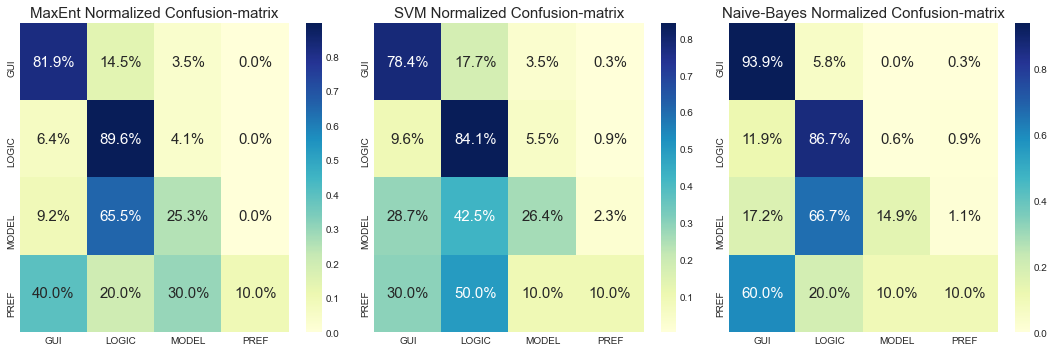

In [214]:
fig, axis = plt.subplots(1,3, figsize=(15, 5))
axis[0].set_title(metrics_max_ent.name + " Normalized Confusion-matrix",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Normalized Confusion-matrix",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Normalized Confusion-matrix",fontsize = 15)
fig1 = metrics_max_ent.visualize_normalized_confusion_matrix(axis[0])
fig2 = metrics_svm.visualize_normalized_confusion_matrix(axis[1])
fig3 = metrics_naive.visualize_normalized_confusion_matrix(axis[2])
plt.tight_layout()
plt.show()

# Classification report

835


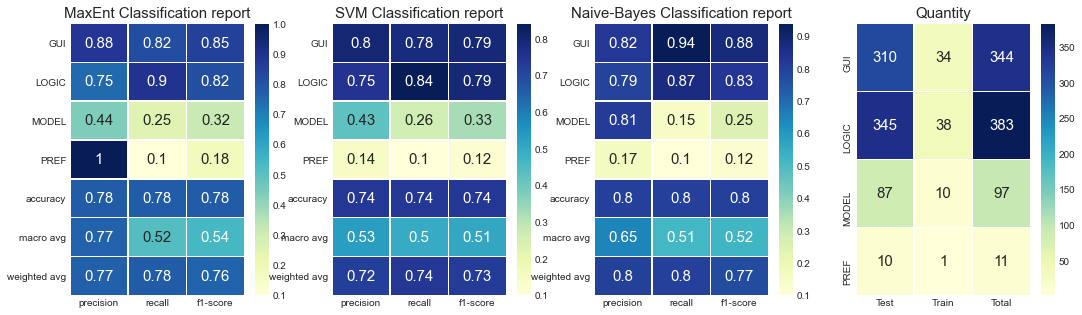

<Figure size 432x288 with 0 Axes>

In [215]:
fig, axis = plt.subplots(1,4, figsize=(18, 5))
axis[0].set_title(metrics_max_ent.name + " Classification report",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Classification report",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Classification report",fontsize = 15)
axis[3].set_title("Quantity", fontsize=15)
fig1 = metrics_max_ent.plot_data_info(axis[0])
fig2 = metrics_svm.plot_data_info(axis[1])
fig3 = metrics_naive.plot_data_info(axis[2])
metrics_naive.plot_support_table(axis[3])
plt.tight_layout()
plt.show()


# Prediction averages

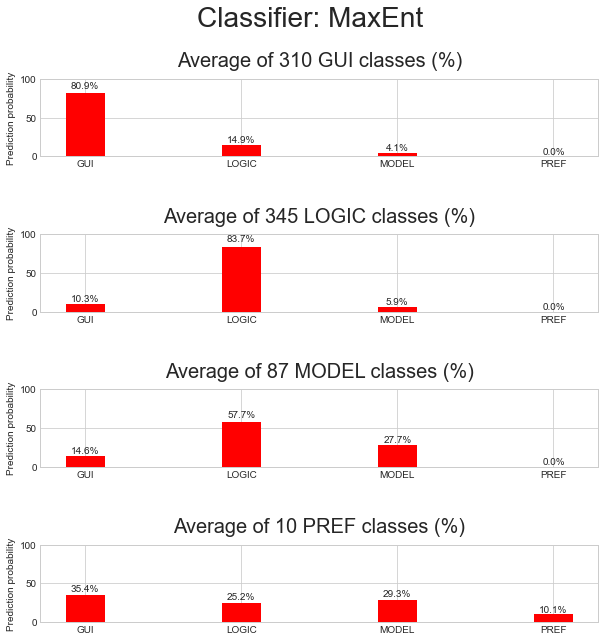

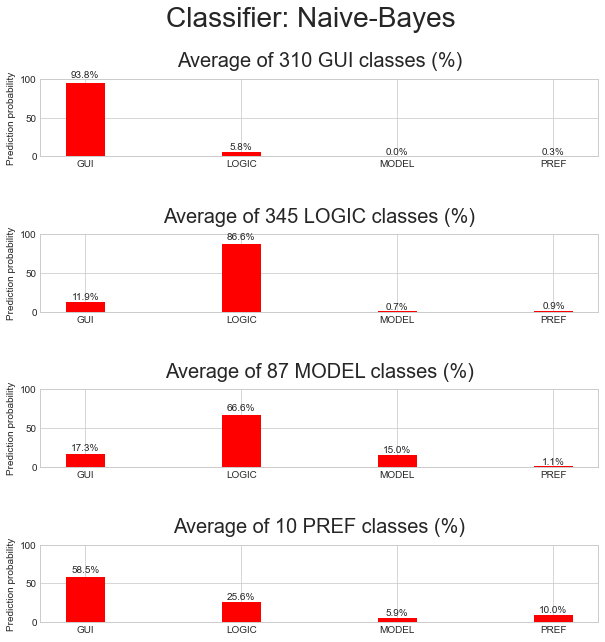

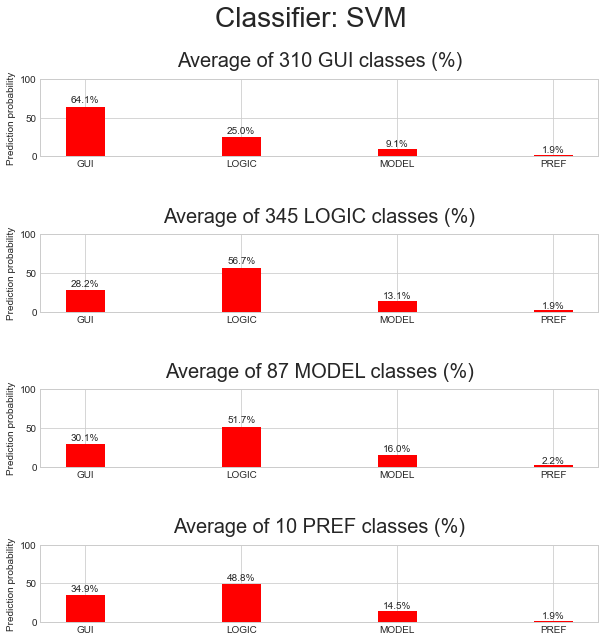

In [216]:
metrics_max_ent.plot_predictionScoreAverage(classifier_max_ent)
metrics_naive.plot_predictionScoreAverage(classifier_naive)
metrics_svm.plot_predictionScoreAverage(classifier_svm)

In [217]:
maxEnt_accuracy_test1.append(metrics_max_ent.get_accuracy_score())
svm_accuracy_test1.append(metrics_svm.get_accuracy_score())
naive_accuracy_test1.append(metrics_naive.get_accuracy_score())

maxEnt_precision_test1.append(metrics_max_ent.get_precision_score())
svm_precision_test1.append(metrics_svm.get_precision_score())
naive_precision_test1.append(metrics_naive.get_precision_score())

maxEnt_recall_test1.append(metrics_max_ent.get_recall_score())
svm_recall_test1.append(metrics_svm.get_recall_score())
naive_recall_test1.append(metrics_naive.get_recall_score())

# Test 2
- Test size: 85 %
- Train size: 15 %

In [218]:
test_size=0.85
fold_quantity = 10
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
confusion_list = []

evaluate = Eva.Evaluation(df_sliced, feature_representation, test_size, fold_quantity)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt()
classifier_svm , metrics_svm = evaluate.evaluate_SVM()
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes()

# Evaluation
## Confusion matrix


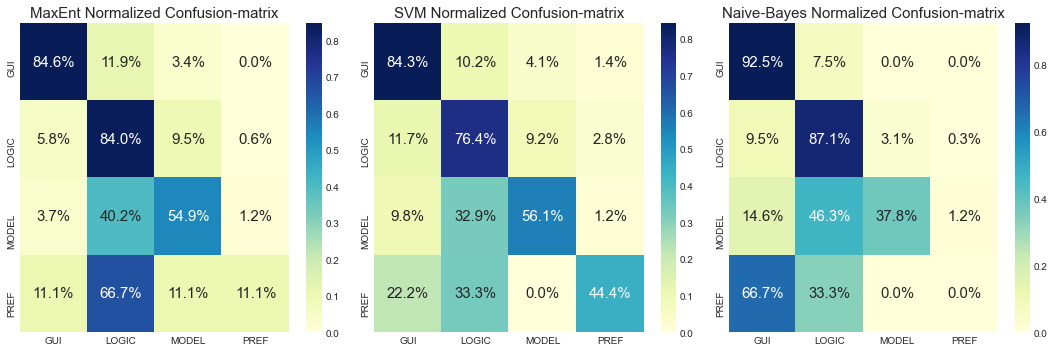

In [219]:
fig, axis = plt.subplots(1,3, figsize=(15, 5))
axis[0].set_title(metrics_max_ent.name + " Normalized Confusion-matrix",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Normalized Confusion-matrix",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Normalized Confusion-matrix",fontsize = 15)
fig1 = metrics_max_ent.visualize_normalized_confusion_matrix(axis[0])
fig2 = metrics_svm.visualize_normalized_confusion_matrix(axis[1])
fig3 = metrics_naive.visualize_normalized_confusion_matrix(axis[2])
plt.tight_layout()
plt.show()

# Classification report

835


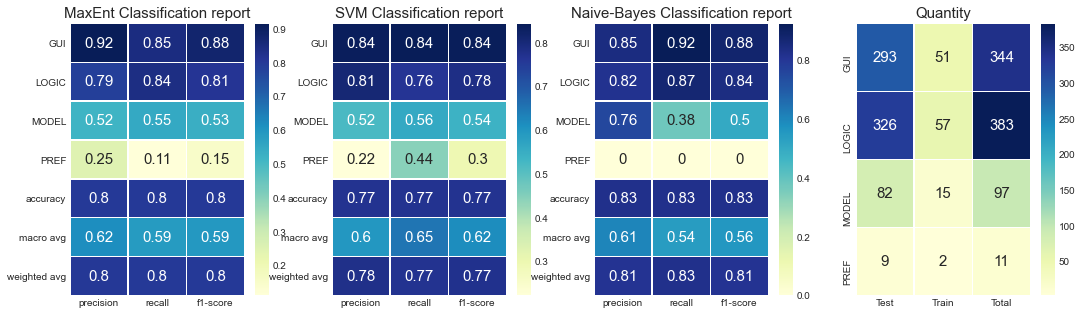

<Figure size 432x288 with 0 Axes>

In [220]:
fig, axis = plt.subplots(1,4, figsize=(18, 5))
axis[0].set_title(metrics_max_ent.name + " Classification report",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Classification report",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Classification report",fontsize = 15)
axis[3].set_title("Quantity", fontsize=15)
fig1 = metrics_max_ent.plot_data_info(axis[0])
fig2 = metrics_svm.plot_data_info(axis[1])
fig3 = metrics_naive.plot_data_info(axis[2])
metrics_naive.plot_support_table(axis[3])
plt.tight_layout()
plt.show()

# Prediction average

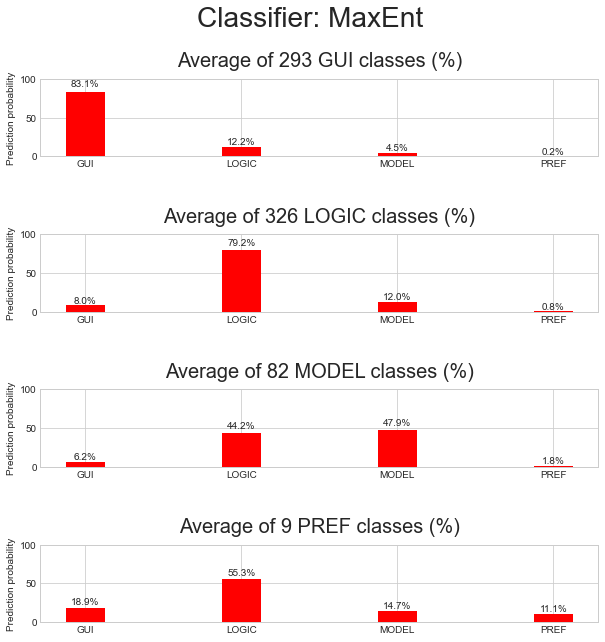

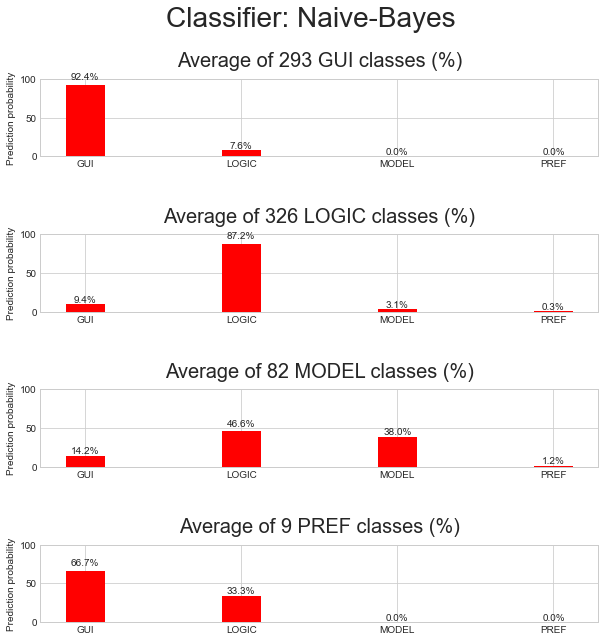

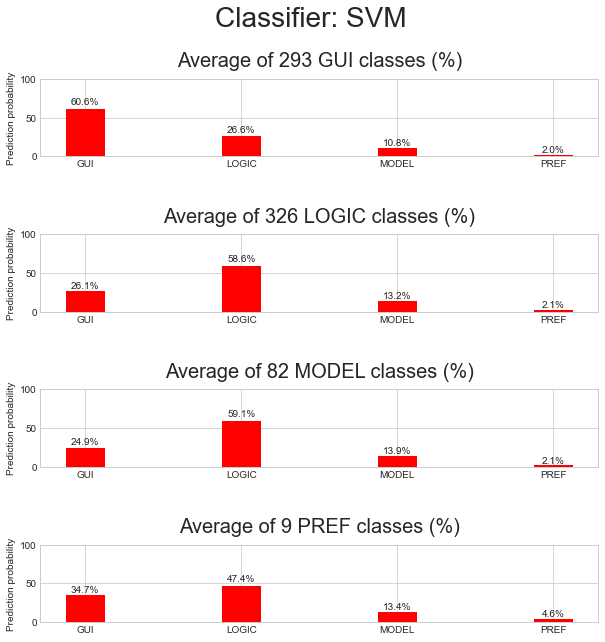

In [221]:
metrics_max_ent.plot_predictionScoreAverage(classifier_max_ent)
metrics_naive.plot_predictionScoreAverage(classifier_naive)
metrics_svm.plot_predictionScoreAverage(classifier_svm)

In [222]:
maxEnt_accuracy_test1.append(metrics_max_ent.get_accuracy_score())
svm_accuracy_test1.append(metrics_svm.get_accuracy_score())
naive_accuracy_test1.append(metrics_naive.get_accuracy_score())

maxEnt_precision_test1.append(metrics_max_ent.get_precision_score())
svm_precision_test1.append(metrics_svm.get_precision_score())
naive_precision_test1.append(metrics_naive.get_precision_score())


maxEnt_recall_test1.append(metrics_max_ent.get_recall_score())
svm_recall_test1.append(metrics_svm.get_recall_score())
naive_recall_test1.append(metrics_naive.get_recall_score())

# Test 3
- Test-size : 80%
- Train-size: 20%

In [223]:
test_size=0.80
fold_quantity = 10
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
confusion_list = []

evaluate = Eva.Evaluation(df_sliced, feature_representation, test_size, fold_quantity)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt()
classifier_svm , metrics_svm = evaluate.evaluate_SVM()
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes()

# Evaluation
## Confusion matrix

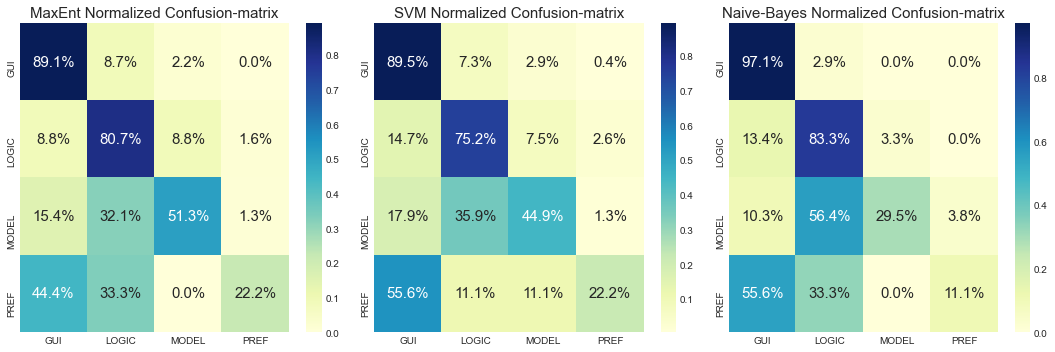

In [224]:
fig, axis = plt.subplots(1,3, figsize=(15, 5))
axis[0].set_title(metrics_max_ent.name + " Normalized Confusion-matrix",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Normalized Confusion-matrix",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Normalized Confusion-matrix",fontsize = 15)
fig1 = metrics_max_ent.visualize_normalized_confusion_matrix(axis[0])
fig2 = metrics_svm.visualize_normalized_confusion_matrix(axis[1])
fig3 = metrics_naive.visualize_normalized_confusion_matrix(axis[2])
plt.tight_layout()
plt.show()

## Classification report

835


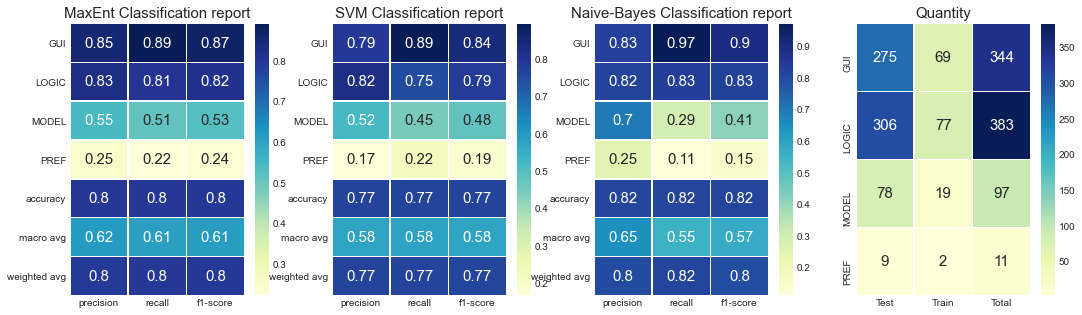

<Figure size 432x288 with 0 Axes>

In [225]:
fig, axis = plt.subplots(1,4, figsize=(18, 5))
axis[0].set_title(metrics_max_ent.name + " Classification report",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Classification report",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Classification report",fontsize = 15)
axis[3].set_title("Quantity", fontsize=15)
fig1 = metrics_max_ent.plot_data_info(axis[0])
fig2 = metrics_svm.plot_data_info(axis[1])
fig3 = metrics_naive.plot_data_info(axis[2])
metrics_naive.plot_support_table(axis[3])
plt.tight_layout()
plt.show()

## prediction average

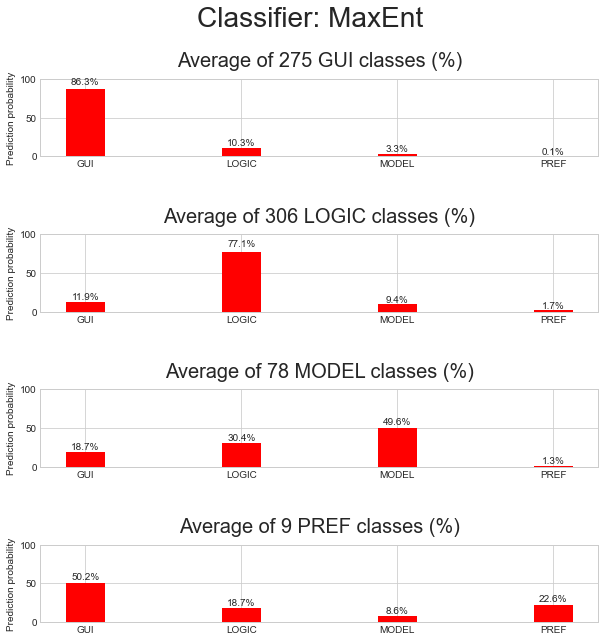

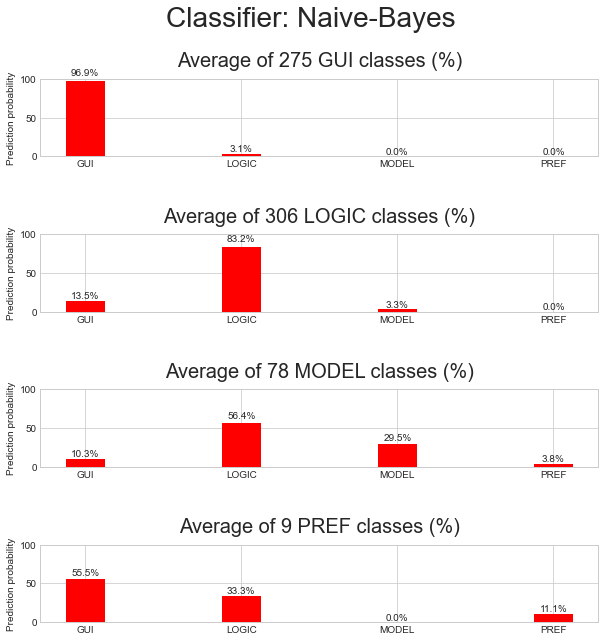

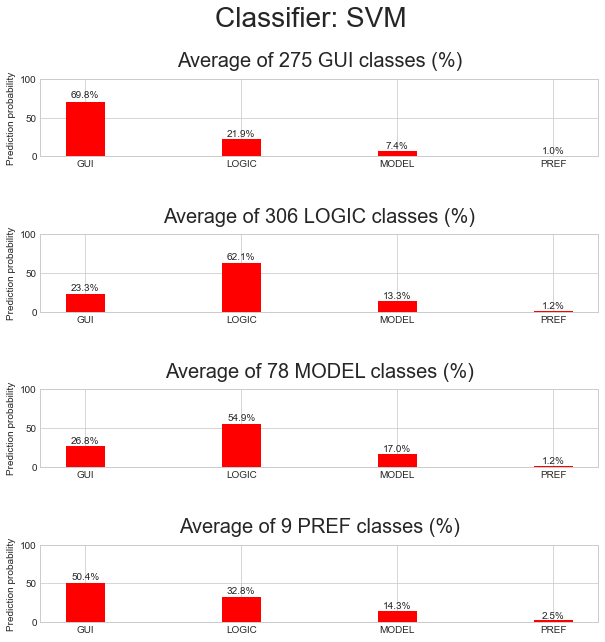

In [226]:
metrics_max_ent.plot_predictionScoreAverage(classifier_max_ent)
metrics_naive.plot_predictionScoreAverage(classifier_naive)
metrics_svm.plot_predictionScoreAverage(classifier_svm)

In [227]:
maxEnt_accuracy_test1.append(metrics_max_ent.get_accuracy_score())
svm_accuracy_test1.append(metrics_svm.get_accuracy_score())
naive_accuracy_test1.append(metrics_naive.get_accuracy_score())

maxEnt_precision_test1.append(metrics_max_ent.get_precision_score())
svm_precision_test1.append(metrics_svm.get_precision_score())
naive_precision_test1.append(metrics_naive.get_precision_score())


maxEnt_recall_test1.append(metrics_max_ent.get_recall_score())
svm_recall_test1.append(metrics_svm.get_recall_score())
naive_recall_test1.append(metrics_naive.get_recall_score())

# Test 3
- Test-size : 75%
- Train-size: 25%

In [228]:
test_size=0.75
fold_quantity = 10
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
confusion_list = []

evaluate = Eva.Evaluation(df_sliced, feature_representation, test_size, fold_quantity)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt()
classifier_svm , metrics_svm = evaluate.evaluate_SVM()
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes()

# Evaluation
## Confusion matrix

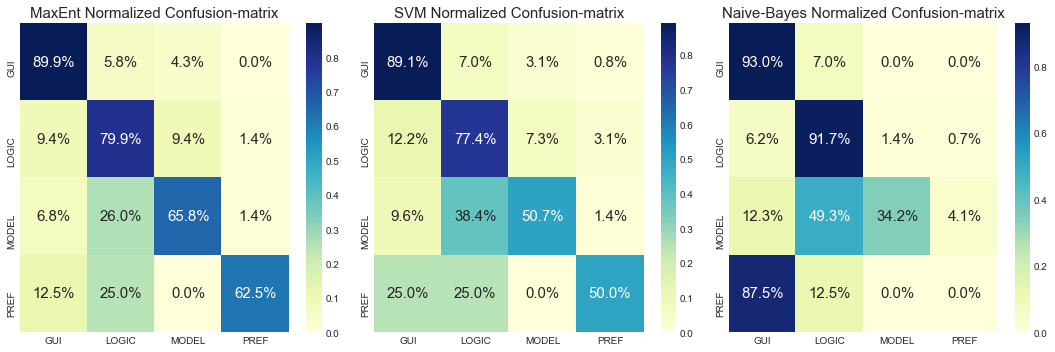

In [229]:
fig, axis = plt.subplots(1,3, figsize=(15, 5))
axis[0].set_title(metrics_max_ent.name + " Normalized Confusion-matrix",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Normalized Confusion-matrix",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Normalized Confusion-matrix",fontsize = 15)
fig1 = metrics_max_ent.visualize_normalized_confusion_matrix(axis[0])
fig2 = metrics_svm.visualize_normalized_confusion_matrix(axis[1])
fig3 = metrics_naive.visualize_normalized_confusion_matrix(axis[2])
plt.tight_layout()
plt.show()

## Classification report

835


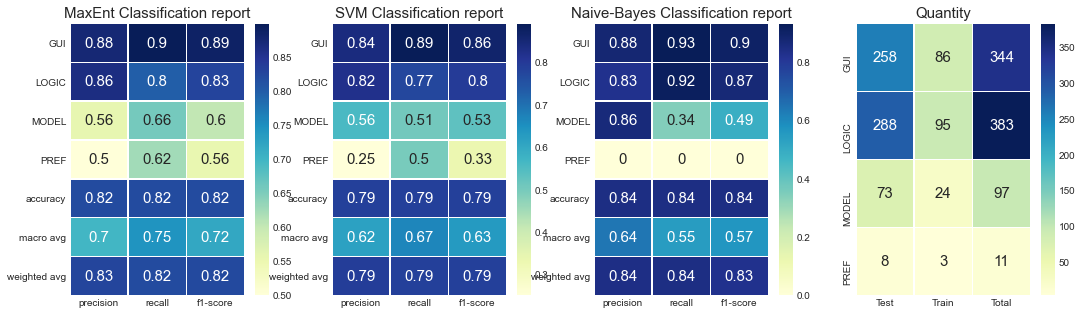

<Figure size 432x288 with 0 Axes>

In [230]:
fig, axis = plt.subplots(1,4, figsize=(18, 5))
axis[0].set_title(metrics_max_ent.name + " Classification report",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Classification report",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Classification report",fontsize = 15)
axis[3].set_title("Quantity", fontsize=15)
fig1 = metrics_max_ent.plot_data_info(axis[0])
fig2 = metrics_svm.plot_data_info(axis[1])
fig3 = metrics_naive.plot_data_info(axis[2])
metrics_naive.plot_support_table(axis[3])
plt.tight_layout()
plt.show()

## prediction average

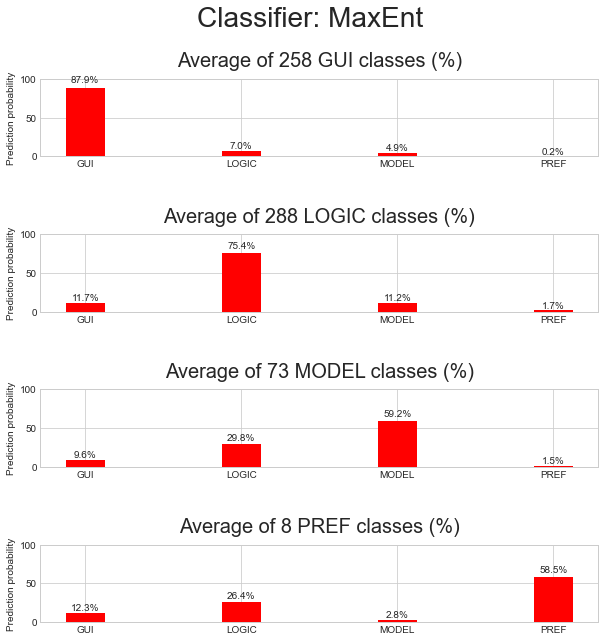

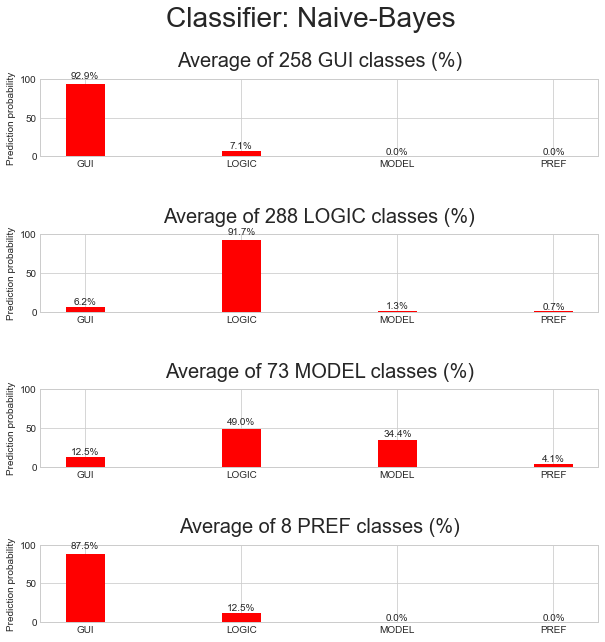

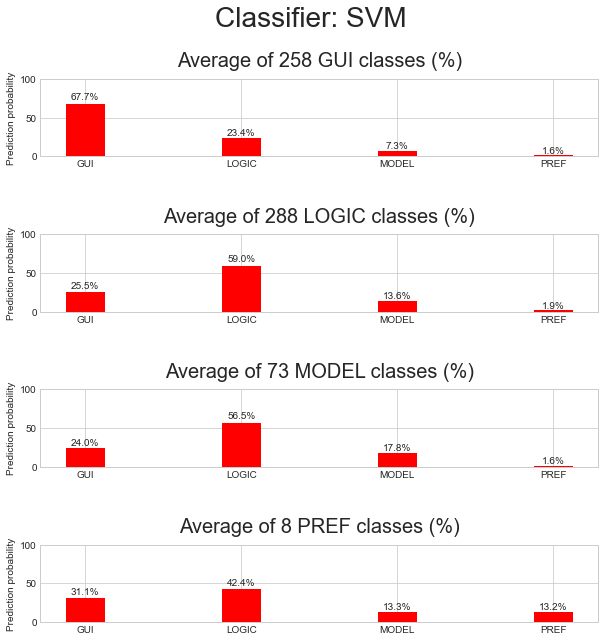

In [231]:
metrics_max_ent.plot_predictionScoreAverage(classifier_max_ent)
metrics_naive.plot_predictionScoreAverage(classifier_naive)
metrics_svm.plot_predictionScoreAverage(classifier_svm)

In [232]:
maxEnt_accuracy_test1.append(metrics_max_ent.get_accuracy_score())
svm_accuracy_test1.append(metrics_svm.get_accuracy_score())
naive_accuracy_test1.append(metrics_naive.get_accuracy_score())

maxEnt_precision_test1.append(metrics_max_ent.get_precision_score())
svm_precision_test1.append(metrics_svm.get_precision_score())
naive_precision_test1.append(metrics_naive.get_precision_score())


maxEnt_recall_test1.append(metrics_max_ent.get_recall_score())
svm_recall_test1.append(metrics_svm.get_recall_score())
naive_recall_test1.append(metrics_naive.get_recall_score())

# Overall performance for test_size

In [242]:
def plot_line_graph(title: str,x_axis,y_axis: dict, x_axis_name, y_axis_name):
    fig = plt.figure(figsize=(8,8))
    ax1 = fig.add_subplot(111)
    plt.title(title,fontsize = 20)
    ax1.set_ylim(0,1)
    plt.ylabel(y_axis_name,fontsize = 15)
    plt.xlabel(x_axis_name, fontsize = 15)
    
    ax1.scatter(x_axis, y_axis['naive'], s=50, c='b', marker="x", label='Naive-Bayes')
    ax1.plot(x_axis, y_axis['naive'], c='b')
    
    ax1.scatter(x_axis,y_axis['maxEnt'], s=50, c='r', marker="x", label='MaxEnt')
    ax1.plot(x_axis,y_axis['maxEnt'], c='r')
    
    ax1.scatter(x_axis, y_axis['svm'], s=50, c='g', marker="x", label='SVM')
    ax1.plot(x_axis,y_axis['svm'], c='g')
    
    plt.legend(loc='upper left');
    plt.show()

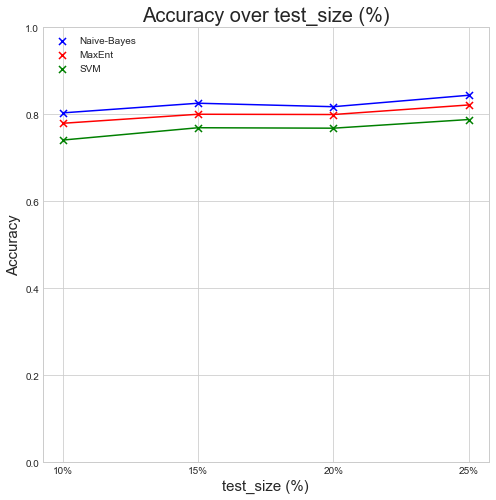

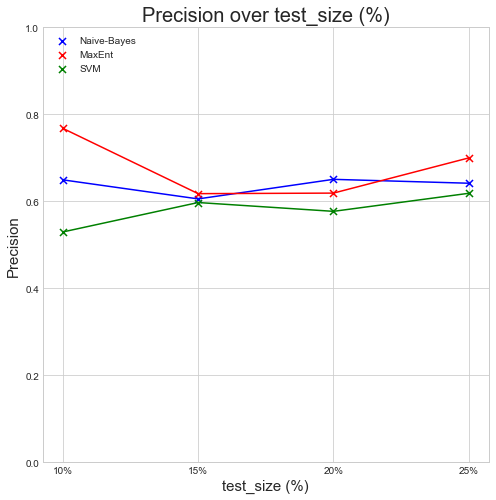

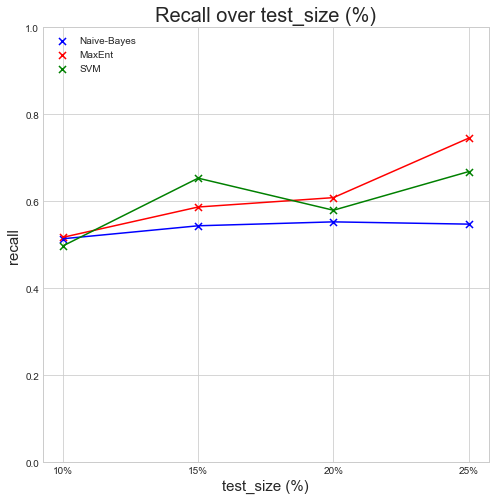

In [244]:
train_size = ['10%','15%','20%','25%']
number_of_files = ['5','10','15','20','25']
y_axis = {
    'naive': naive_accuracy_test1,
    'maxEnt': maxEnt_accuracy_test1,
    'svm': svm_accuracy_test1
}
#########ACCURACY#############################

plot_line_graph("Accuracy over test_size (%)", train_size, y_axis, "test_size (%)", "Accuracy")
##############################################

##############PRECISION#######################
plot_line_graph("Precision over test_size (%)", train_size, {'naive': naive_precision_test1,
                                                             'maxEnt': maxEnt_precision_test1,
                                                             'svm': svm_precision_test1
                                                            }, "test_size (%)", "Precision",)
##############RECALL#######################
plot_line_graph("Recall over test_size (%)", train_size, {'naive': naive_recall_test1,
                                                             'maxEnt': maxEnt_recall_test1,
                                                             'svm': svm_recall_test1
                                                            }, "test_size (%)", "recall",)





# Test:
    - specify number of files/concern
    -number of files: 5, 10, 15, 20

# Test: 5 files/concern

maxEnt_accuracy_test2 = []
svm_accuracy_test2 = []
naive_accuracy_test2 = []

maxEnt_weight_precision_test2 = []
svm_weigth_precision_test2 = []
naive_precision_test2 = []

maxEnt_recall_test2 = []
svm_recall_test2 = []
naive_recall_test2 = []


In [272]:
maxEnt_accuracy_test2= []
svm_accuracy_test2 = []
naive_accuracy_test2 = []

maxEnt_precision_test2= []
svm_precision_test2 = []
naive_precision_test2 = []

maxEnt_recall_test2= []
svm_recall_test2 = []
naive_recall_test2 = []

num_of_files = 5
fold_quantity = 10
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
confusion_list = []
## the parameter 'type=custom' signals the evalutation to perfroms specified splitting,
##instead of precentage as been done in above tests
evaluate = Eva.Evaluation(df_sliced, feature_representation,fold_quantity,numberOfFiles= num_of_files)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt(type = 'custom')
classifier_svm , metrics_svm = evaluate.evaluate_SVM(type = 'custom')
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes(type = 'custom')

# Evaluation
## Confusion matrix

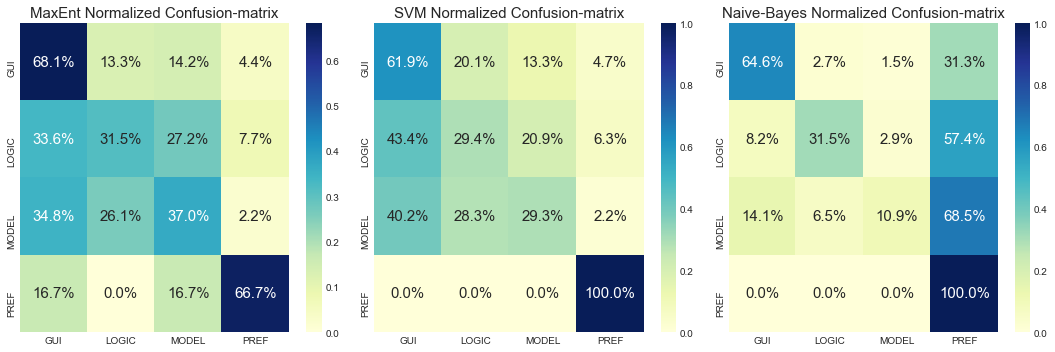

In [273]:
fig, axis = plt.subplots(1,3, figsize=(15, 5))
axis[0].set_title(metrics_max_ent.name + " Normalized Confusion-matrix",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Normalized Confusion-matrix",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Normalized Confusion-matrix",fontsize = 15)
fig1 = metrics_max_ent.visualize_normalized_confusion_matrix(axis[0])
fig2 = metrics_svm.visualize_normalized_confusion_matrix(axis[1])
fig3 = metrics_naive.visualize_normalized_confusion_matrix(axis[2])
plt.tight_layout()
plt.show()

## Classification report

835


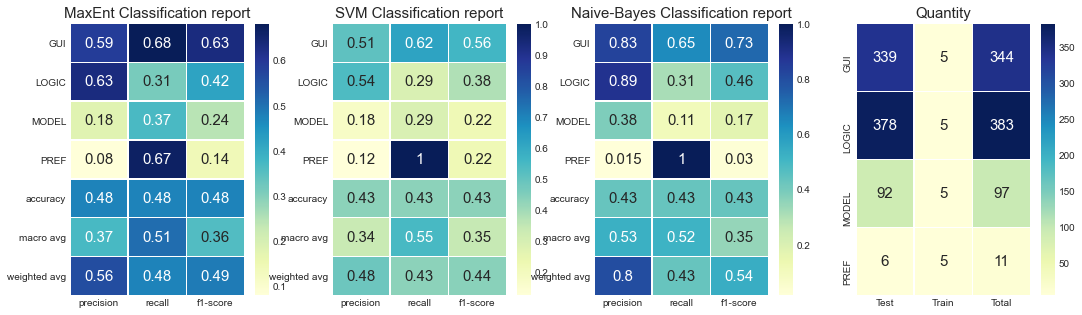

<Figure size 432x288 with 0 Axes>

In [274]:
fig, axis = plt.subplots(1,4, figsize=(18, 5))
axis[0].set_title(metrics_max_ent.name + " Classification report",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Classification report",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Classification report",fontsize = 15)
axis[3].set_title("Quantity", fontsize=15)
fig1 = metrics_max_ent.plot_data_info(axis[0])
fig2 = metrics_svm.plot_data_info(axis[1])
fig3 = metrics_naive.plot_data_info(axis[2])
metrics_naive.plot_support_table(axis[3])
plt.tight_layout()
plt.show()

## prediction average

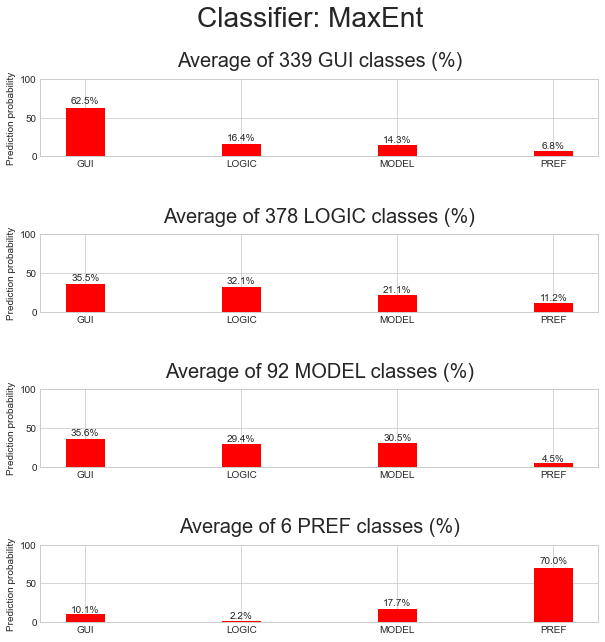

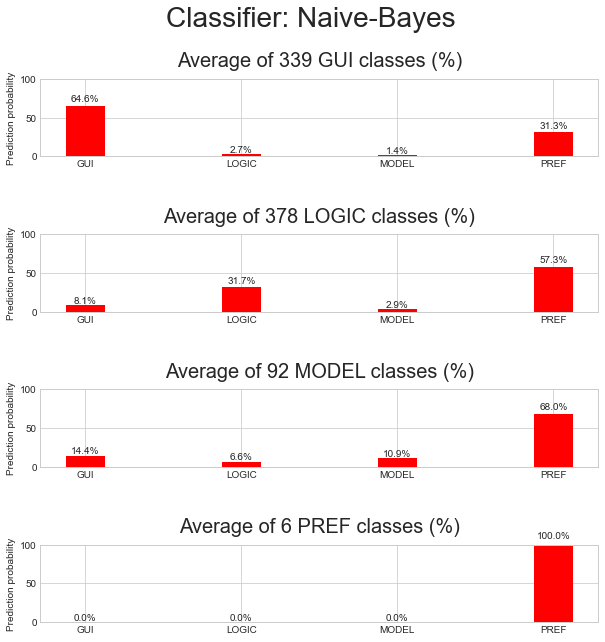

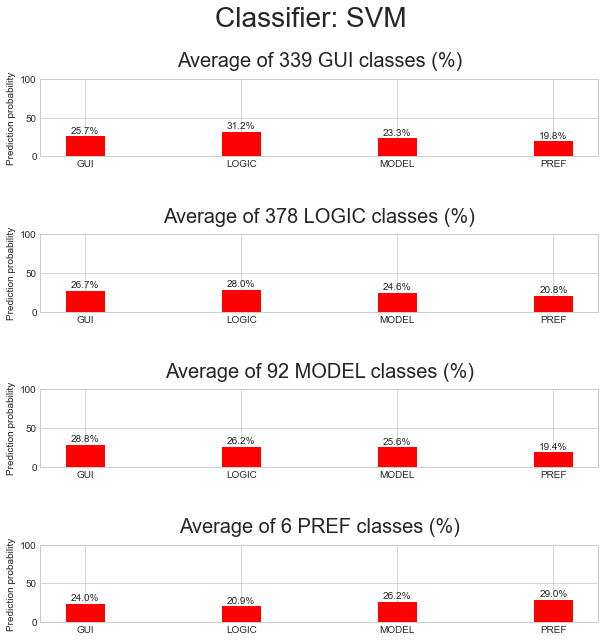

In [275]:
metrics_max_ent.plot_predictionScoreAverage(classifier_max_ent)
metrics_naive.plot_predictionScoreAverage(classifier_naive)
metrics_svm.plot_predictionScoreAverage(classifier_svm)

In [276]:
maxEnt_accuracy_test2.append(metrics_max_ent.get_accuracy_score())
svm_accuracy_test2.append(metrics_svm.get_accuracy_score())
naive_accuracy_test2.append(metrics_naive.get_accuracy_score())

maxEnt_precision_test2.append(metrics_max_ent.get_precision_score())
svm_precision_test2.append(metrics_svm.get_precision_score())
naive_precision_test2.append(metrics_naive.get_precision_score())

maxEnt_recall_test2.append(metrics_max_ent.get_recall_score())
svm_recall_test2.append(metrics_svm.get_recall_score())
naive_recall_test2.append(metrics_naive.get_recall_score())

# Test 10 files/ concern

In [277]:
num_of_files = 10
fold_quantity = 10
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
confusion_list = []
evaluate = Eva.Evaluation(df_sliced, feature_representation,fold_quantity,numberOfFiles= num_of_files)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt(type = 'custom')
classifier_svm , metrics_svm = evaluate.evaluate_SVM(type = 'custom')
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes(type = 'custom')

# Evaluation
## Confusion matrix

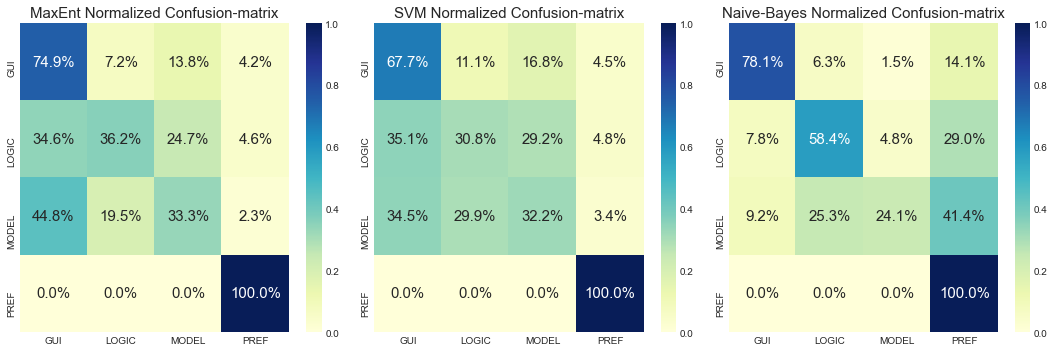

In [278]:
fig, axis = plt.subplots(1,3, figsize=(15, 5))
axis[0].set_title(metrics_max_ent.name + " Normalized Confusion-matrix",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Normalized Confusion-matrix",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Normalized Confusion-matrix",fontsize = 15)
fig1 = metrics_max_ent.visualize_normalized_confusion_matrix(axis[0])
fig2 = metrics_svm.visualize_normalized_confusion_matrix(axis[1])
fig3 = metrics_naive.visualize_normalized_confusion_matrix(axis[2])
plt.tight_layout()
plt.show()

# Classification report

835


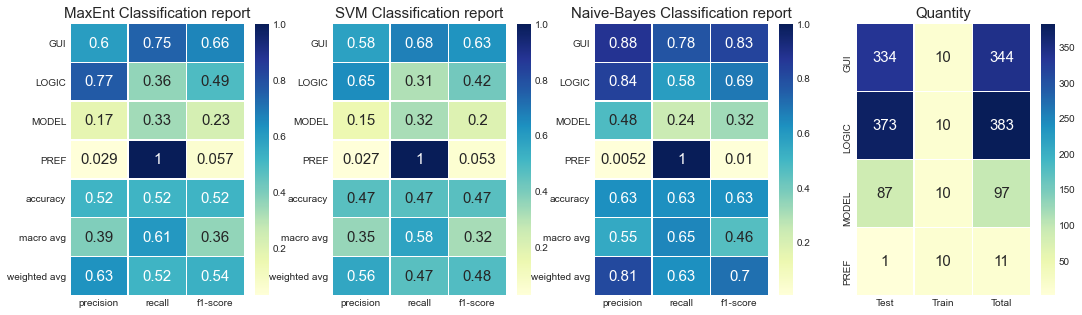

<Figure size 432x288 with 0 Axes>

In [279]:
fig, axis = plt.subplots(1,4, figsize=(18, 5))
axis[0].set_title(metrics_max_ent.name + " Classification report",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Classification report",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Classification report",fontsize = 15)
axis[3].set_title("Quantity", fontsize=15)
fig1 = metrics_max_ent.plot_data_info(axis[0])
fig2 = metrics_svm.plot_data_info(axis[1])
fig3 = metrics_naive.plot_data_info(axis[2])
metrics_naive.plot_support_table(axis[3])
plt.tight_layout()
plt.show()

# Prediction average

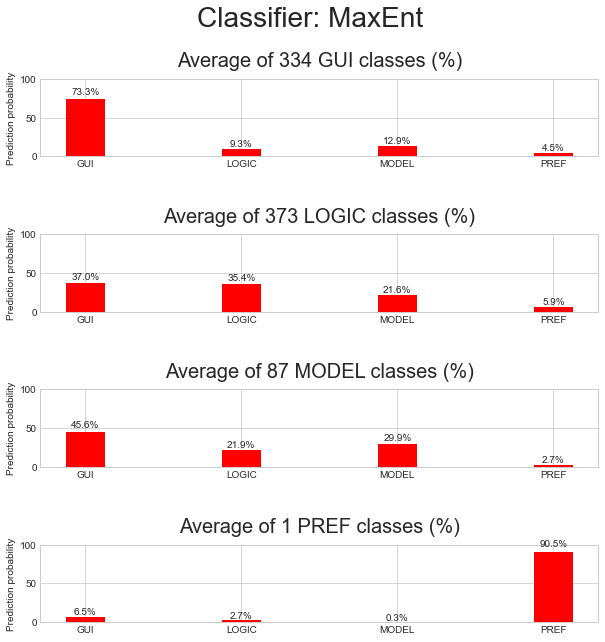

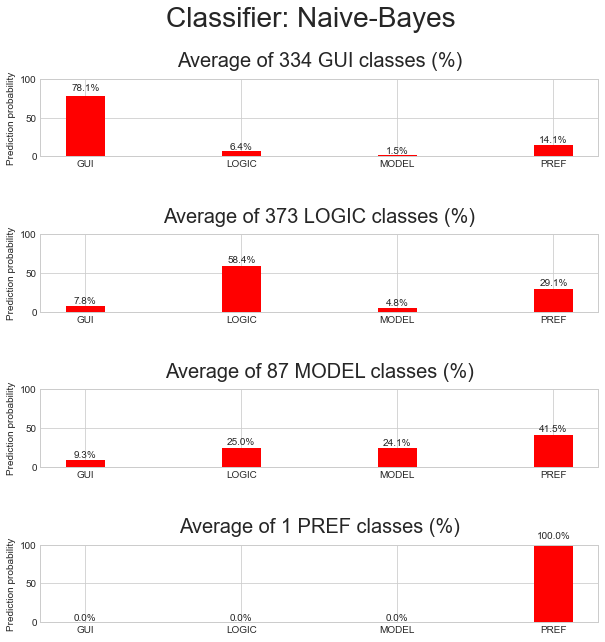

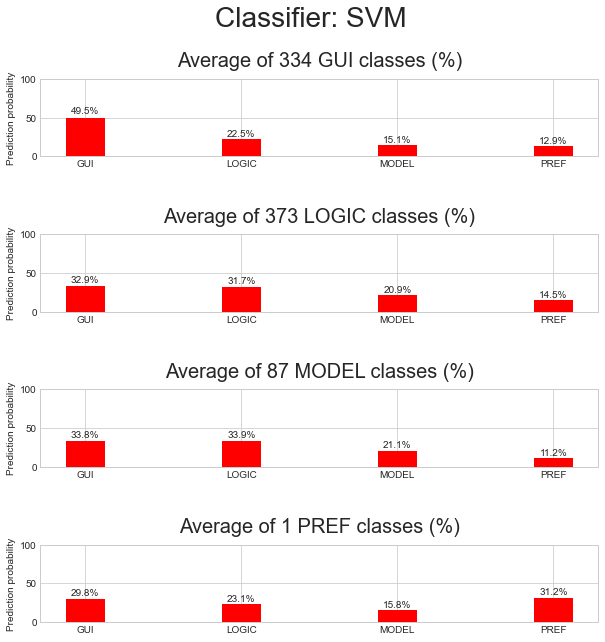

In [280]:
metrics_max_ent.plot_predictionScoreAverage(classifier_max_ent)
metrics_naive.plot_predictionScoreAverage(classifier_naive)
metrics_svm.plot_predictionScoreAverage(classifier_svm)

In [281]:
maxEnt_accuracy_test2.append(metrics_max_ent.get_accuracy_score())
svm_accuracy_test2.append(metrics_svm.get_accuracy_score())
naive_accuracy_test2.append(metrics_naive.get_accuracy_score())

maxEnt_precision_test2.append(metrics_max_ent.get_precision_score())
svm_precision_test2.append(metrics_svm.get_precision_score())
naive_precision_test2.append(metrics_naive.get_precision_score())

maxEnt_recall_test2.append(metrics_max_ent.get_recall_score())
svm_recall_test2.append(metrics_svm.get_recall_score())
naive_recall_test2.append(metrics_naive.get_recall_score())

# Test: 15 files/concern

In [282]:
num_of_files = 15
fold_quantity = 10
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
confusion_list = []
df_sliced =  Eva.filter_unwanted_labels(basic_df, 'Label', ['PREF','GLOBALS', 'CLI'])

evaluate = Eva.Evaluation(df_sliced, feature_representation,fold_quantity,numberOfFiles= num_of_files)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt(type = 'custom')
classifier_svm , metrics_svm = evaluate.evaluate_SVM(type = 'custom')
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes(type = 'custom')

# Evaluation
## Confusion matrix

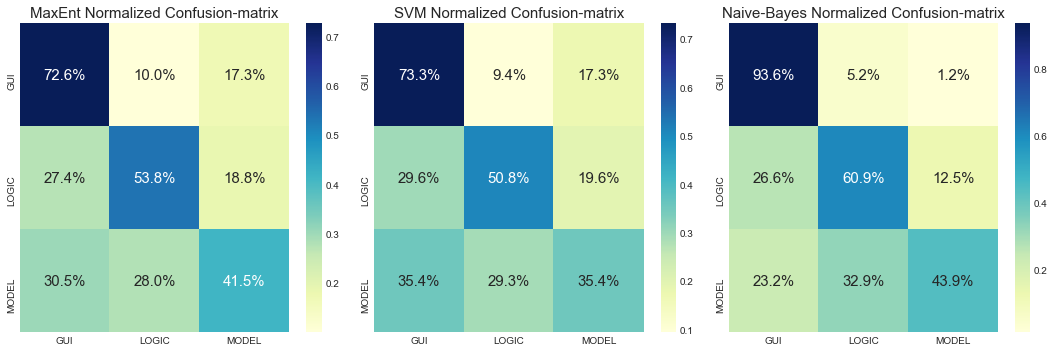

In [283]:
fig, axis = plt.subplots(1,3, figsize=(15, 5))
axis[0].set_title(metrics_max_ent.name + " Normalized Confusion-matrix",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Normalized Confusion-matrix",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Normalized Confusion-matrix",fontsize = 15)
fig1 = metrics_max_ent.visualize_normalized_confusion_matrix(axis[0])
fig2 = metrics_svm.visualize_normalized_confusion_matrix(axis[1])
fig3 = metrics_naive.visualize_normalized_confusion_matrix(axis[2])
plt.tight_layout()
plt.show()

# Classification report

824


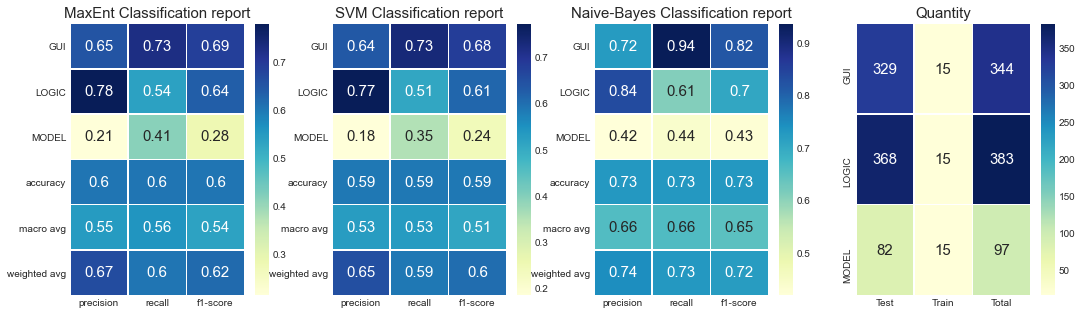

<Figure size 432x288 with 0 Axes>

In [284]:
fig, axis = plt.subplots(1,4, figsize=(18, 5))
axis[0].set_title(metrics_max_ent.name + " Classification report",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Classification report",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Classification report",fontsize = 15)
axis[3].set_title("Quantity", fontsize=15)
fig1 = metrics_max_ent.plot_data_info(axis[0])
fig2 = metrics_svm.plot_data_info(axis[1])
fig3 = metrics_naive.plot_data_info(axis[2])
metrics_naive.plot_support_table(axis[3])
plt.tight_layout()
plt.show()

# Prediction average

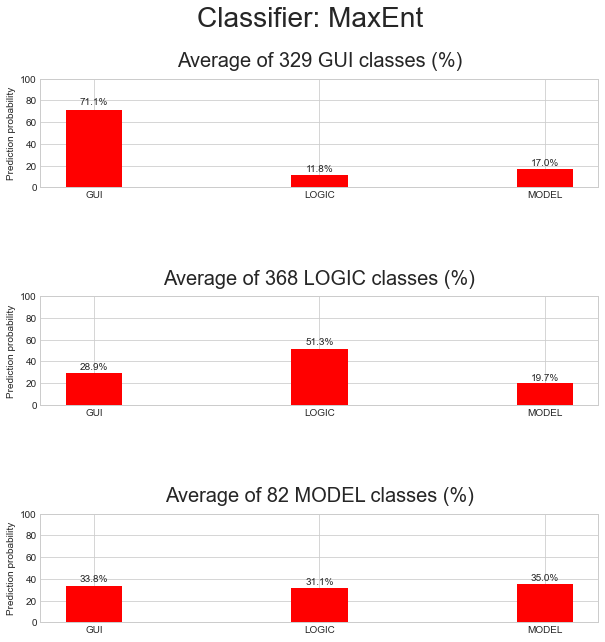

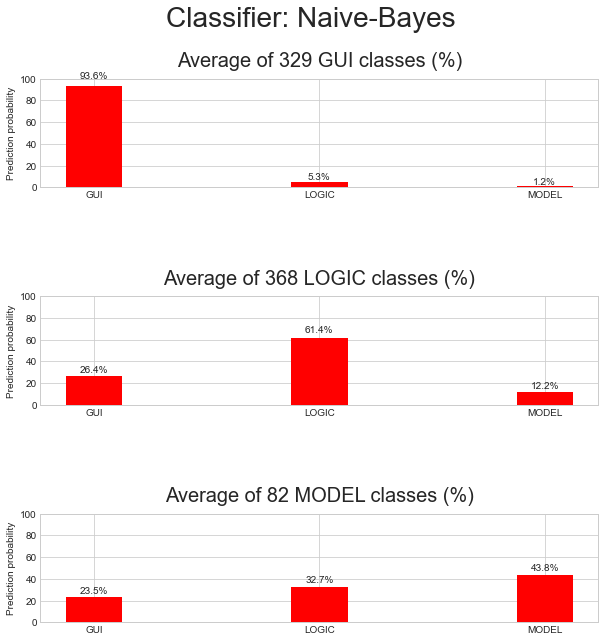

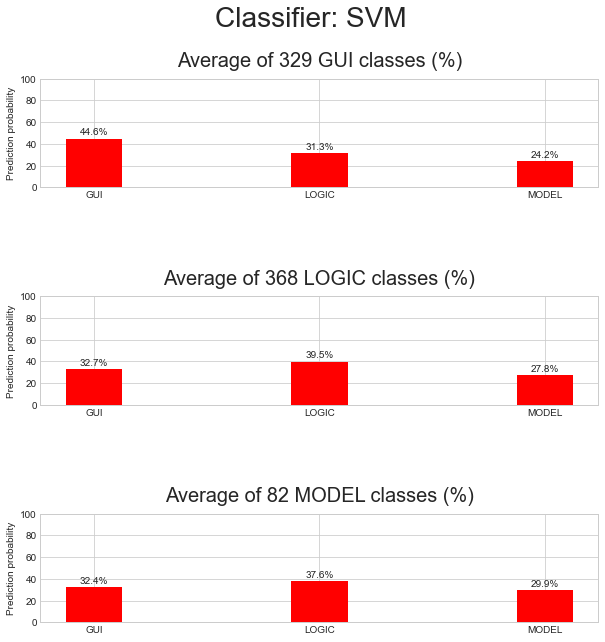

In [285]:
metrics_max_ent.plot_predictionScoreAverage(classifier_max_ent)
metrics_naive.plot_predictionScoreAverage(classifier_naive)
metrics_svm.plot_predictionScoreAverage(classifier_svm)

In [286]:
maxEnt_accuracy_test2.append(metrics_max_ent.get_accuracy_score())
svm_accuracy_test2.append(metrics_svm.get_accuracy_score())
naive_accuracy_test2.append(metrics_naive.get_accuracy_score())

maxEnt_precision_test2.append(metrics_max_ent.get_precision_score())
svm_precision_test2.append(metrics_svm.get_precision_score())
naive_precision_test2.append(metrics_naive.get_precision_score())

maxEnt_recall_test2.append(metrics_max_ent.get_recall_score())
svm_recall_test2.append(metrics_svm.get_recall_score())
naive_recall_test2.append(metrics_naive.get_recall_score())

# Test 20 files/concern

In [287]:
num_of_files = 20
fold_quantity = 10
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
confusion_list = []
df_sliced =  Eva.filter_unwanted_labels(basic_df, 'Label', ['PREF','GLOBALS', 'CLI'])

evaluate = Eva.Evaluation(df_sliced, feature_representation,fold_quantity,numberOfFiles= num_of_files)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt(type = 'custom')
classifier_svm , metrics_svm = evaluate.evaluate_SVM(type = 'custom')
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes(type = 'custom')

# Evaluation
## Confusion matrix

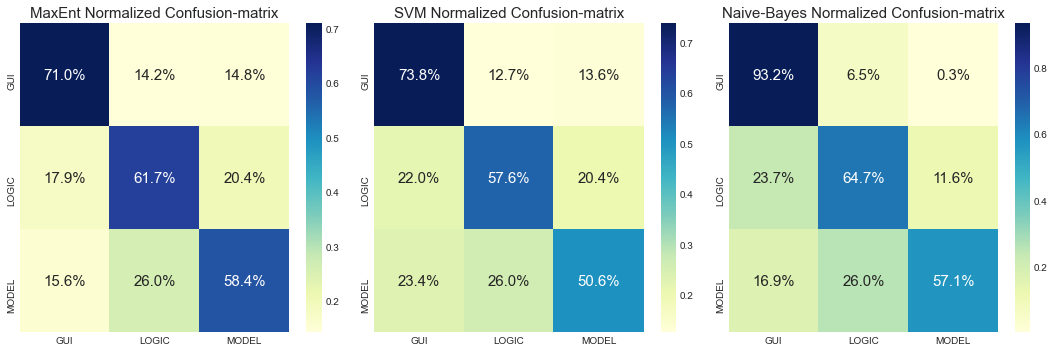

In [288]:
fig, axis = plt.subplots(1,3, figsize=(15, 5))
axis[0].set_title(metrics_max_ent.name + " Normalized Confusion-matrix",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Normalized Confusion-matrix",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Normalized Confusion-matrix",fontsize = 15)
fig1 = metrics_max_ent.visualize_normalized_confusion_matrix(axis[0])
fig2 = metrics_svm.visualize_normalized_confusion_matrix(axis[1])
fig3 = metrics_naive.visualize_normalized_confusion_matrix(axis[2])
plt.tight_layout()
plt.show()

# Classification report

824


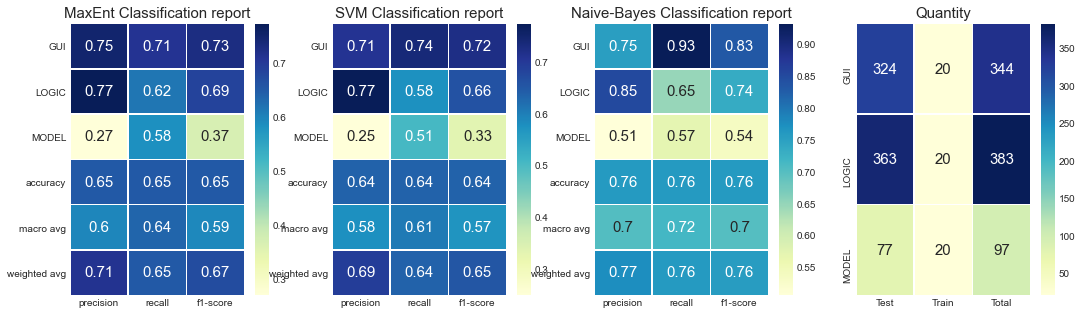

<Figure size 432x288 with 0 Axes>

In [289]:
fig, axis = plt.subplots(1,4, figsize=(18, 5))
axis[0].set_title(metrics_max_ent.name + " Classification report",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Classification report",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Classification report",fontsize = 15)
axis[3].set_title("Quantity", fontsize=15)
fig1 = metrics_max_ent.plot_data_info(axis[0])
fig2 = metrics_svm.plot_data_info(axis[1])
fig3 = metrics_naive.plot_data_info(axis[2])
metrics_naive.plot_support_table(axis[3])
plt.tight_layout()
plt.show()

# Prediction average

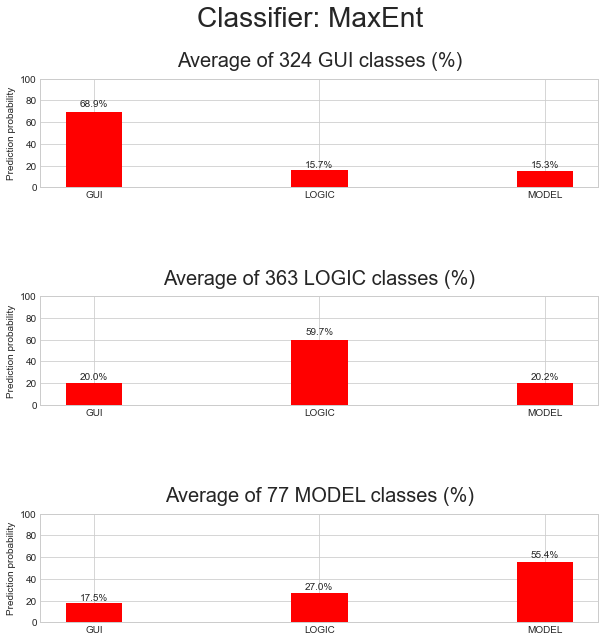

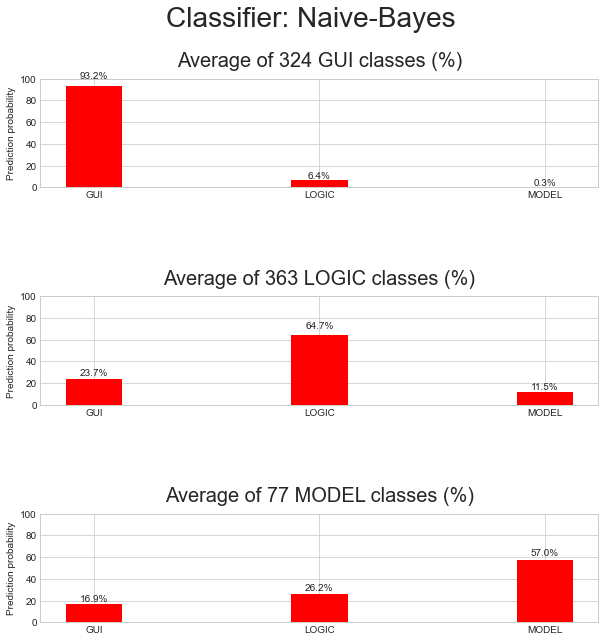

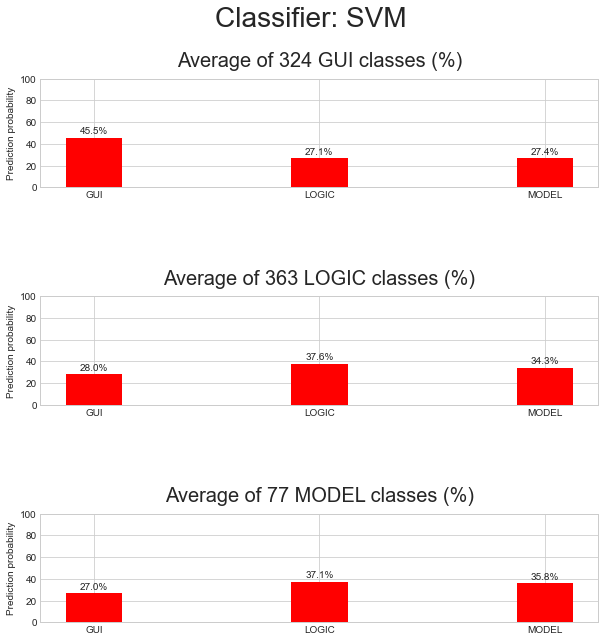

In [290]:
metrics_max_ent.plot_predictionScoreAverage(classifier_max_ent)
metrics_naive.plot_predictionScoreAverage(classifier_naive)
metrics_svm.plot_predictionScoreAverage(classifier_svm)

In [291]:
maxEnt_accuracy_test2.append(metrics_max_ent.get_accuracy_score())
svm_accuracy_test2.append(metrics_svm.get_accuracy_score())
naive_accuracy_test2.append(metrics_naive.get_accuracy_score())

maxEnt_precision_test2.append(metrics_max_ent.get_precision_score())
svm_precision_test2.append(metrics_svm.get_precision_score())
naive_precision_test2.append(metrics_naive.get_precision_score())

maxEnt_recall_test2.append(metrics_max_ent.get_recall_score())
svm_recall_test2.append(metrics_svm.get_recall_score())
naive_recall_test2.append(metrics_naive.get_recall_score())

In [292]:
# Test: 25 files/concern

In [293]:
num_of_files = 25
fold_quantity = 10
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
confusion_list = []
df_sliced =  Eva.filter_unwanted_labels(basic_df, 'Label', ['PREF','GLOBALS', 'CLI'])

evaluate = Eva.Evaluation(df_sliced, feature_representation,fold_quantity,numberOfFiles= num_of_files)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt(type = 'custom')
classifier_svm , metrics_svm = evaluate.evaluate_SVM(type = 'custom')
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes(type = 'custom')

# Evaluation
## Confusion matrix

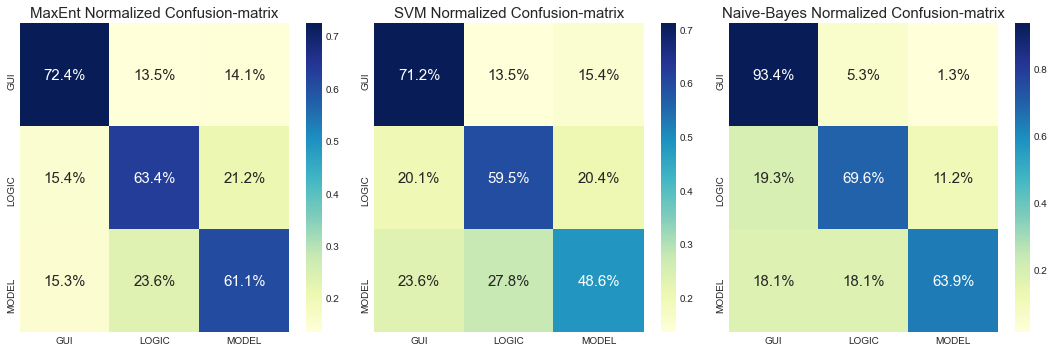

In [294]:
fig, axis = plt.subplots(1,3, figsize=(15, 5))
axis[0].set_title(metrics_max_ent.name + " Normalized Confusion-matrix",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Normalized Confusion-matrix",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Normalized Confusion-matrix",fontsize = 15)
fig1 = metrics_max_ent.visualize_normalized_confusion_matrix(axis[0])
fig2 = metrics_svm.visualize_normalized_confusion_matrix(axis[1])
fig3 = metrics_naive.visualize_normalized_confusion_matrix(axis[2])
plt.tight_layout()
plt.show()

# Classification report

824


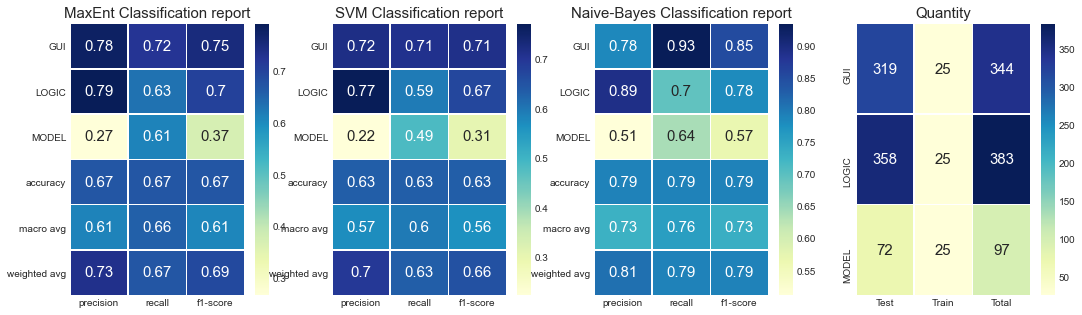

<Figure size 432x288 with 0 Axes>

In [295]:
fig, axis = plt.subplots(1,4, figsize=(18, 5))
axis[0].set_title(metrics_max_ent.name + " Classification report",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Classification report",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Classification report",fontsize = 15)
axis[3].set_title("Quantity", fontsize=15)
fig1 = metrics_max_ent.plot_data_info(axis[0])
fig2 = metrics_svm.plot_data_info(axis[1])
fig3 = metrics_naive.plot_data_info(axis[2])
metrics_naive.plot_support_table(axis[3])
plt.tight_layout()
plt.show()

# Prediction average

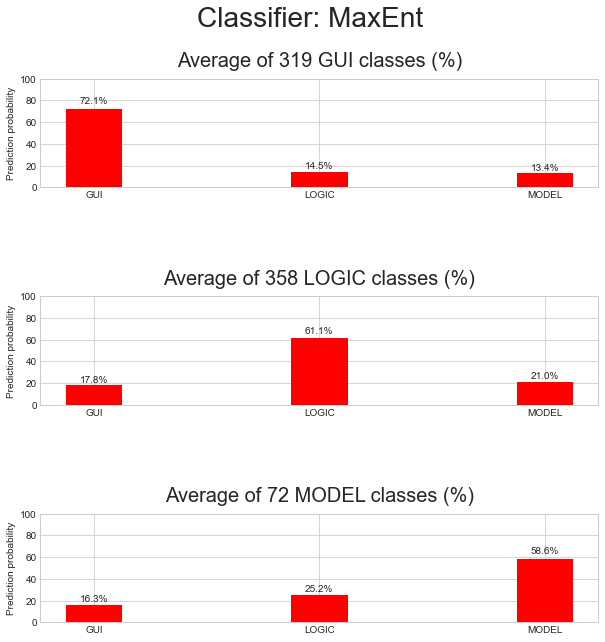

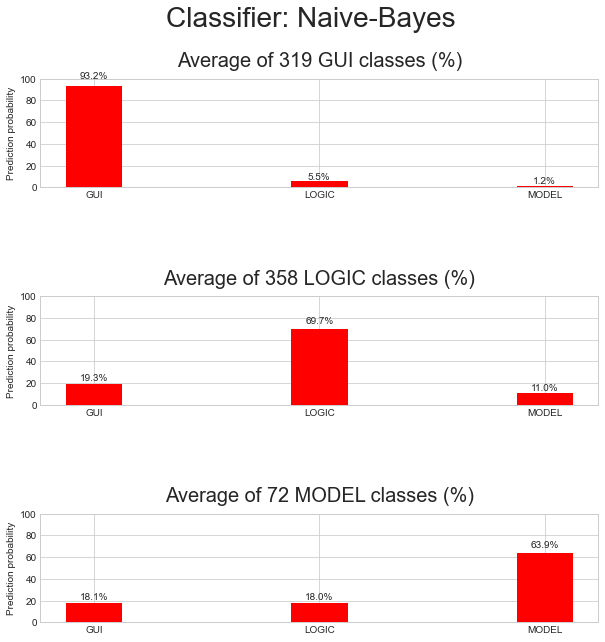

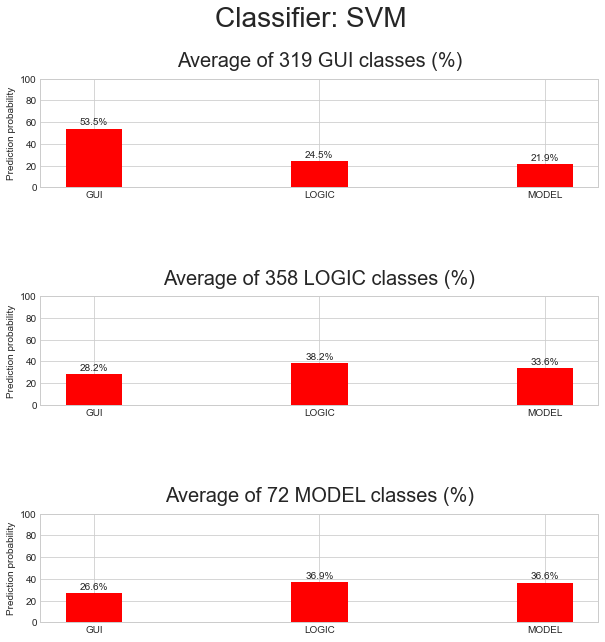

In [296]:
metrics_max_ent.plot_predictionScoreAverage(classifier_max_ent)
metrics_naive.plot_predictionScoreAverage(classifier_naive)
metrics_svm.plot_predictionScoreAverage(classifier_svm)

In [297]:
maxEnt_accuracy_test2.append(metrics_max_ent.get_accuracy_score())
svm_accuracy_test2.append(metrics_svm.get_accuracy_score())
naive_accuracy_test2.append(metrics_naive.get_accuracy_score())

maxEnt_precision_test2.append(metrics_max_ent.get_precision_score())
svm_precision_test2.append(metrics_svm.get_precision_score())
naive_precision_test2.append(metrics_naive.get_precision_score())

maxEnt_recall_test2.append(metrics_max_ent.get_recall_score())
svm_recall_test2.append(metrics_svm.get_recall_score())
naive_recall_test2.append(metrics_naive.get_recall_score())

# Overall performance for number of files

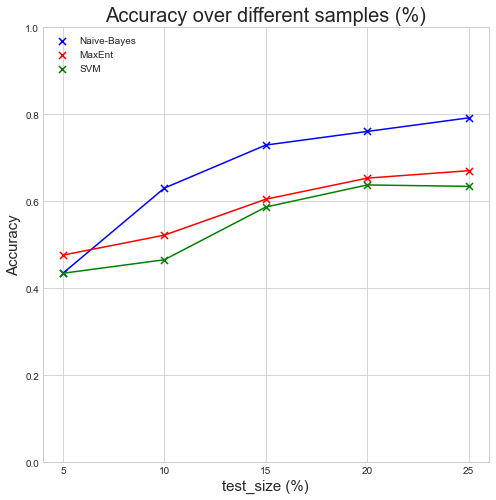

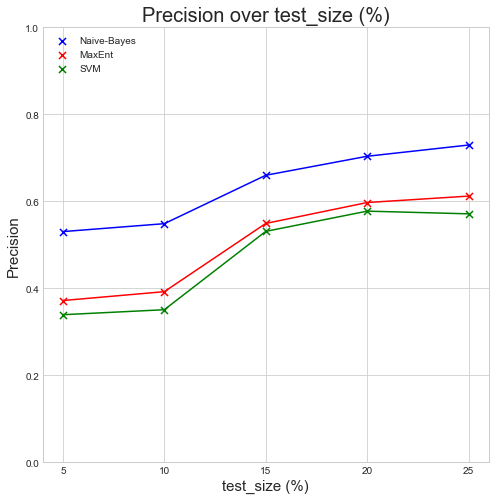

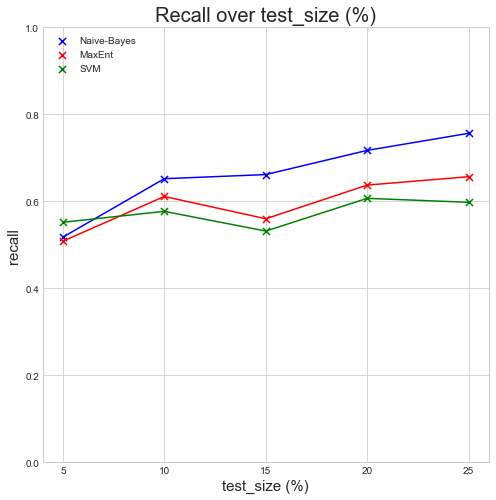

In [299]:
number_of_files = ['5','10','15','20','25']
y_axis = {
    'naive': naive_accuracy_test2,
    'maxEnt': maxEnt_accuracy_test2,
    'svm': svm_accuracy_test2
}
#########ACCURACY#############################

plot_line_graph("Accuracy over different samples (%)", number_of_files , {'naive': naive_accuracy_test2,
                                                             'maxEnt': maxEnt_accuracy_test2,
                                                             'svm': svm_accuracy_test2
                                                            }, "test_size (%)", "Accuracy")
##############################################

##############PRECISION#######################
plot_line_graph("Precision over test_size (%)", number_of_files, {'naive': naive_precision_test2,
                                                             'maxEnt': maxEnt_precision_test2,
                                                             'svm': svm_precision_test2
                                                            }, "test_size (%)", "Precision",)
##############RECALL#######################
plot_line_graph("Recall over test_size (%)", number_of_files, {'naive': naive_recall_test2,
                                                             'maxEnt': maxEnt_recall_test2,
                                                             'svm': svm_recall_test2
                                                            }, "test_size (%)", "recall",)


